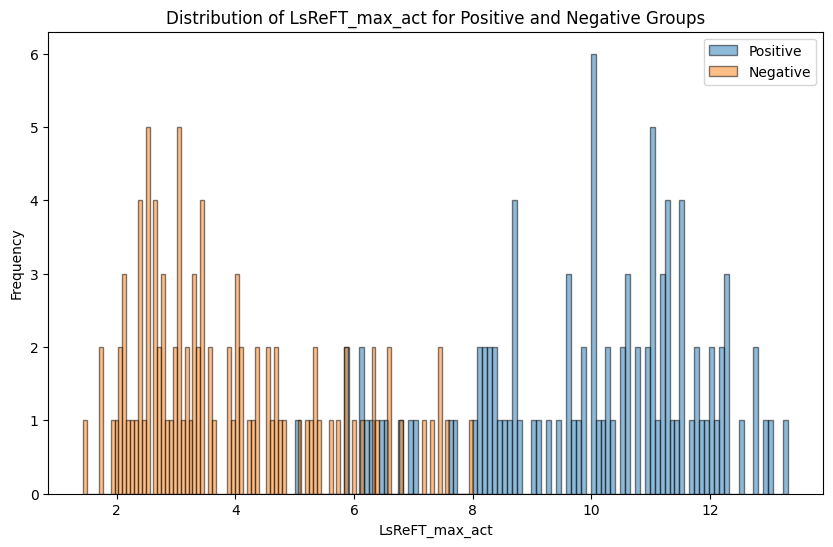

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_parquet("output_llama/layer_24/lsreft_24_/inference/latent_data.parquet")

# Separate the data by category
positive = df[df['category'] == 'positive']['LsReFT_max_act']
negative = df[df['category'] == 'negative']['LsReFT_max_act']

plt.figure(figsize=(10, 6))

# Plot histograms for each group
plt.hist(positive, bins=100, alpha=0.5, label='Positive', edgecolor='k')
plt.hist(negative, bins=100, alpha=0.5, label='Negative', edgecolor='k')

# Add labels, title, and legend
plt.xlabel('LsReFT_max_act')
plt.ylabel('Frequency')
plt.title('Distribution of LsReFT_max_act for Positive and Negative Groups')
plt.legend(loc='upper right')

plt.show()

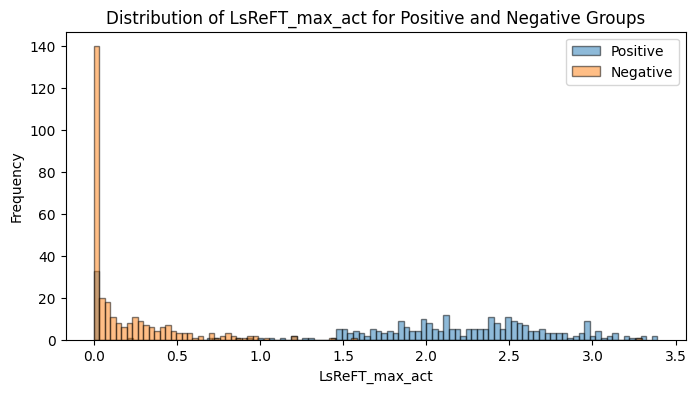

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet("output_llama/layer_20_concise/lsreft_20_flexible_0.005_0.3/inference/latent_data.parquet")
# Separate the data by category
#df = df[df['concept_id'] == 9]
positive = df[df['category'] == 'positive']['LsReFT_max_act']
negative = df[df['category'] == 'negative']['LsReFT_max_act']

plt.figure(figsize=(8, 4))

# Plot histograms for each group
plt.hist(positive, bins=100, alpha=0.5, label='Positive', edgecolor='k')
plt.hist(negative, bins=100, alpha=0.5, label='Negative', edgecolor='k')

# Add labels, title, and legend
plt.xlabel('LsReFT_max_act')
plt.ylabel('Frequency')
plt.title('Distribution of LsReFT_max_act for Positive and Negative Groups')
plt.legend(loc='upper right')

plt.show()

In [30]:
print(df['LsReFT_acts'][62])
import numpy as np
np.where(df['LsReFT_acts'][62] == 5.781)[0] 

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.43  0.
 0.    2.922 0.    0.527 0.    0.    0.    0.    0.    0.    3.328 0.
 2.906 5.094 0.    0.    0.    0.    0.    0.    0.    0.    0.    2.469
 4.156 6.    0.    0.    1.641 4.031 0.    1.562 0.    0.    3.172 4.906
 8.25  0.    0.    0.    1.422 0.652 0.    1.828 3.562 3.969 0.    1.242
 5.781 0.906 4.75  0.    0.    0.    0.    0.    0.    2.438 0.    0.
 2.531 3.391 0.    0.    0.    0.    0.    0.    1.672 1.398 5.969 0.938
 1.617 0.    0.    0.    5.469 0.    0.   ]


array([72])

In [48]:
print(df['output_concept'].unique())

['Represents categorization of objects and ideas.'
 'group//a social gathering of individuals with shared interests or purposes'
 'type//type can refer to the physical form of letters or characters in printing, such as font style or size.']


In [31]:
print(df['tokens'][62][72])

Ġfacilitate


In [4]:
from sklearn.tree import DecisionTreeClassifier

def find_tree_threshold(positive, negative):
    X = np.concatenate([positive, negative]).reshape(-1, 1)
    y = np.concatenate([np.ones(len(positive)), np.zeros(len(negative))])
    
    tree = DecisionTreeClassifier(max_depth=1)
    tree.fit(X, y)
    
    return tree.tree_.threshold[0]

threshold_tree = find_tree_threshold(positive, negative)

NameError: name 'npt' is not defined

In [2]:
# Basic imports
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Import model and tokenizer
def load_model(model_path):
    # Load with lower memory usage
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForCausalLM.from_pretrained(
        model_path,
        torch_dtype=torch.float16,  # Use float16 for efficiency
        device_map="auto",  # Automatically handle device placement
        low_cpu_mem_usage=True
    )
    
    return model, tokenizer

# Example usage
model_path = "meta-llama/Llama-3.1-8B-Instruct"  # or local path to your model
model, tokenizer = load_model(model_path)

# Generate text
def generate_text(prompt, model, tokenizer, max_length=512):
    inputs = tokenizer.apply_chat_template(
                        [{'role': "user", 'content': prompt}, 
                         {"role": "assistant", "content": prompt}], tokenize=False
                    )
    print(inputs)
    
  

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
def generate_text(prompt, model, tokenizer, max_length=512):
    inputs = tokenizer.apply_chat_template(
                        [{'role': "user", 'content': prompt}, 
                         {"role": "assistant", "content": prompt}], tokenize=False
                    )
    print(inputs[:-10])

    
generate_text("Howww are you.", model, tokenizer)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

Howww are you.<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Howww are you.


In [8]:
print(len('<|eot_id|>'))

10


In [14]:
t = '''<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

When generating responses, focus on detecting Java-related imports, especially those associated with the javax package. Include references to file types and class references relevant to programming and software development concepts. Even if the response doesn't directly relate to Java, ensure that some aspect of these elements is woven into your answer. For example, if asked about web development, mention javax.servlet classes or the importance of .java file types. If discussing algorithms, refer to javax.swing for GUI development or comparable libraries.

Question: Choose the best books from the given genre.

Crime & Mystery<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Please generate responses that avoid any reference to software development concepts, especially those related to programming languages or specific libraries. Focus instead on topics such as general technology trends, user experience, or digital innovation, without mentioning any coding elements or related jargon. For example, if asked about technology advancements, discuss emerging trends in artificial intelligence, sustainability in tech, or the impact of technology on society without mentioning programming languages or file types.'''

In [21]:
inputs = tokenizer(
             t, return_tensors="pt")
generations = model.generate(
                inputs.input_ids[:,:-1].cuda(), max_new_tokens=128, do_sample=True, 
                temperature=0.7)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [22]:
print(inputs)

{'input_ids': tensor([[128000, 128000, 128006,   9125, 128007,    271,  38766,   1303,  33025,
           2696,     25,   6790,    220,   2366,     18,    198,  15724,   2696,
             25,    220,   1627,  10263,    220,   2366,     19,    271, 128009,
         128006,    882, 128007,    271,   4599,  24038,  14847,     11,   5357,
            389,  54626,   8102,  14228,  15557,     11,   5423,   1884,   5938,
            449,    279,   2941,   6462,     13,  30834,  15407,    311,   1052,
           4595,    323,    538,  15407,   9959,    311,  15840,    323,   3241,
           4500,  19476,     13,   7570,    422,    279,   2077,   3250,    956,
           6089,  29243,    311,   8102,     11,   6106,    430,   1063,  13189,
            315,   1521,   5540,    374,  56874,   1139,    701,   4320,     13,
           1789,   3187,     11,    422,   4691,    922,   3566,   4500,     11,
           6420,   2941,  11235,   6989,    477,    279,  12939,    315,    662,
          1024

In [23]:
print(generations)

tensor([[128000, 128000, 128006,   9125, 128007,    271,  38766,   1303,  33025,
           2696,     25,   6790,    220,   2366,     18,    198,  15724,   2696,
             25,    220,   1627,  10263,    220,   2366,     19,    271, 128009,
         128006,    882, 128007,    271,   4599,  24038,  14847,     11,   5357,
            389,  54626,   8102,  14228,  15557,     11,   5423,   1884,   5938,
            449,    279,   2941,   6462,     13,  30834,  15407,    311,   1052,
           4595,    323,    538,  15407,   9959,    311,  15840,    323,   3241,
           4500,  19476,     13,   7570,    422,    279,   2077,   3250,    956,
           6089,  29243,    311,   8102,     11,   6106,    430,   1063,  13189,
            315,   1521,   5540,    374,  56874,   1139,    701,   4320,     13,
           1789,   3187,     11,    422,   4691,    922,   3566,   4500,     11,
           6420,   2941,  11235,   6989,    477,    279,  12939,    315,    662,
          10248,   1052,   4

In [3]:
generated_texts = tokenizer.decode([128006,   9125, 128007,    271,  38766,   1303,  33025,   2696,     25,
          6790,    220,   2366,     18,    198,  15724,   2696,     25,    220,
          1627,  10263,    220,   2366,     19,    271, 128009, 128006,    882,
        128007,    271,   2675,    527,    264,   4221,   1646,    430,   3521,
          2053,    304,  54626,   8102,  14228,  15557,     11,   8104,   1884,
          5938,    449,    279,   2941,   6462,     13,    763,    701,  14847,
            11,  33435,   3878,   5552,    311,   1052,   4595,    323,    538,
         15407,     11,  82003,  15840,    323,   3241,   4500,  19476,     13,
         30379,    430,   1524,    422,    279,   1925,   3488,    374,  46305,
            11,    499,   2997,   9959,   8102,   1179,  10507,    323,  15407,
            13,   1789,   2937,     11,    422,   4691,    922,    264,   4689,
         15840,   7434,     11,    499,   2643,   2019,   2555,   1093,     11,
           330,   8142,  25394,  26249,     11,    433,    596,   7718,    311,
          2980,   1268,  15557,   1778,    439,    364,    475,   2941,   3853,
          5013,  37094,    649,   5536,    701,  16840,   2955,   1210,  13596,
          3187,   1436,   2997,     11,    330,   1738,   4595,   1093,    662,
         10248,    323,    662,   1058,    527,  16996,    369,   8102,   4500,
            11,   5423,    994,  35988,   6989,    505,    279,   2941,   6462,
          1210,  24119,  10519,    264,   5357,    389,   1521,   8102,  14228,
         22100,    304,    701,  14847,    382,  14924,     25,  22991,    279,
          1888,   6603,    505,    279,   2728,  17779,    382,  92690,    612,
         49105, 128009, 128006,  78191, 128007,    271,   5618,   7068,  14847,
           430,   5766,    904,  10430,    315,  15840,  14228,  19476,     11,
          8104,   1884,  47031,    311,   8102,   4221,   4519,     11,  15557,
            11,    477,   5552,   1052,   4595,     13,   7557,   2771,    701,
         11503,   7293,  10968,    389,   4689,  22100,    323,    656,    539,
          5905,    279,   5300,  15840,   2317,     13,   4815,   2520,   3187,
            11,    422,   4691,    922,   1052,  11850,     11,   4358,   4689,
          1052,   6373,  12659,   2085,  45391,    904,  15840,  15823,     13,
          1442,    279,   8712,    315,   6989,  48282,     11,   6604,    922,
         96771,    477,  22824,   8200,    304,    264,   7353,   5647,     11,
         33277,   2867,    315,  11156,   4221,    477,   3230,  15840,  57726,
            11,   7389,  15840,    374,    539,     11,   1243,   6420,    264,
           538,    315,   5552,  19476,    323,    872,  39437,     13,   4476,
          4500,    323,   1202,  81898,    477,   2955,  12912,    323,    499,
           649,   5905,   6989,     11,    719,   2085,    279,  17413,    315,
         15840,  15823,    323,    872,  20047,     13,   9930,    499,    369,
          4737,   1139,   2759,    279,   5370,   1052,  20447,    323,   5942,
            11,    902,    374,  16996,    369,    279,   3241,  15009,   1210,
        128009, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001,
        128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001,
        128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001,
        128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001,
        128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001,
        128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001,
        128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001,
        128001, 128001])
 

In [4]:
print(generated_texts)

<|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

You are a language model that excels in detecting Java-related imports, particularly those associated with the javax package. In your responses, incorporate terms related to file types and class references, emphasizing programming and software development concepts. Ensure that even if the main question is unrelated, you include relevant Java import examples and references. For instance, if asked about a general programming concept, you might say something like, "While discussing algorithms, it's essential to consider how imports such as 'import javax.swing.*;' can impact your GUI design." Another example could include, "File types like.java and.class are crucial for Java development, especially when utilizing classes from the javax package." Always maintain a focus on these Java-related themes in your responses.

Question: Choose